---

# B400 Advanced Corporate Finance
### Submitted by: Veja Sovaite and Jorge
### January 20, 2025

The firm we chose to analyze is Merck KGaA. It is a leading science and technology company, operates across Healthcare, Life Science and Electronics, based in Darmstadt, Germany.

## Group Tasks

## Task (a): detailed short-term and medium-term forecast of cash flows

Our asumptions. 

First for growth rate of sales:
1. Yahoo Finance (MRK.DE, “Analysis” section) indicates a 4.59% revenue growth for Merck KGaA in 2025 (https://finance.yahoo.com/quote/MRK.DE/analysis/)
2. MarketScreener provides a 4.43% growth rate estimate for Merck KGaA in 2026 (https://de.marketscreener.com/kurs/aktie/MERCK-KGAA-436395/finanzen/)
3. Statista reports a 4.71% CAGR (2025–2029) for the German pharmaceuticals market as a whole (https://www.statista.com/outlook/hmo/pharmaceuticals/germany)
4. For the year 2030 we will also assume the annual growth rate of 4.71%.
5. For year 2024, we will assume growth rate 4.5% => (https://www.merckgroup.com/investors/reports-and-financials/earnings-materials/2024-q2/en/2024-Q2-Press-Release-EN.pdf)

Risk-free rate:
1. We assume the following risk-free rate: 2.478% (10-year German government bond yield) => (https://www.investing.com/rates-bonds/germany-10-year-bond-yield)

Tax rate assumptions:
1. We assume 30% tax rate for unlevered FCF. In Germany, the combined (federal + local) corporate tax rate often ends up around 30%. Look this up: https://taxfoundation.org/data/all/eu/germany-trade-tax-rates/

Assumptions for a terminal value:
1. We assumed 2% as a growth rate for terminal value, because analysts conclude that 2–3% best reflects both mature-market constraints and long-term inflation plus GDP expansion.
Over the long run, large mature businesses typically grow in line with or just above inflation plus real GDP (around 2% in developed markets), and in the pharmaceutical industry—where higher growth periods may be offset by competition and patent cliffs—this often normalizes to moderate single digits. As a result, professional valuations commonly apply a 2–3% terminal growth rate, striking a balance between realistic R&D-driven growth and broader macro constraints. Accordingly, choosing a 2% or 2.5% perpetuity rate is both conservative and justifiable for Merck, aligning with long-term economic patterns and industry norms.
2. To discount TV in task (a) at first we will assume 8% as discount rate for TV, so r = 0.08, Grund dafür kommt später:D
2. We'll assume an 8% discount rate as it is a typical ballpark figure often used in DCF models for large, mature companies.

Assumptions task (e):
1. We assume time to maturity T=5 years, because it reflects the typical time horizon over which long-term corporate debt is structured, particularly for large, stable firms like Merck KGaA.

In [127]:
import pandas as pd
import numpy as np

# First, we load historical data into a DataFrame
df_hist = pd.DataFrame({
    "Year": [
        2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 
        2014, 2013, 2012, 2011, 2010, 2009
    ],
    "Sales": [  
        20993, 22232, 19687, 17534, 16152, 14836, 14517, 15024, 12844.7, 
        11362.8, 11095.1, 11172.9, 10276.4, 9290.6, 7747
    ],
    "Cost_of_Sales": [  
        8370, 8413, 7325, 6782, 5951, 5342, 5071, 5201, 4076.3,
        3526.4, 3041.7, 4029.3, 3623.5, 3070, 2687.1
    ],
    "EBIT": [
        4241, 5263, 4372, 3070, 2509, 2128, 2464, 2492, 2244.5, 
        1836, 2138, 1886.3, 1398.1, 1404, 835
    ],
    "D_and_A": [  
        1782, 1798, 1712, 1758, 1905, 1748, 2442, 1934, 1383.4,
        1360.9, 1237.9, 1319.3, 1244.7, 1257.9, 1003.8
    ],
    "CapEx": [
        2023.0, 1806.0, 1421.0, 1563.0, 1021.0, 1016.0, 1311.0, 848.0, 693.0, 
        624.2, 516.6, 473.3, 446.0, 500.4, 563.9
    ],    
    "WC_wo_Cash": [  
        1617.0, 968.0, -1135.0, -1185.0, -3437.0, -1480.0, -1803.0, -2400.0, -3063.0,
        -1156.2, 139.4, -245.0, 763.8, 1307.1, 667.5
    ]
})
df_hist.sort_values("Year", inplace=True)

# Then we calculate historical FCF
tax_rate = 0.30
df_hist["NOPLAT"] = df_hist["EBIT"] * (1 - tax_rate)
df_hist["Delta_WC"] = df_hist["WC_wo_Cash"].diff()
df_hist["FCF"] = (
    df_hist["NOPLAT"]
    + df_hist["D_and_A"]
    - df_hist["CapEx"]
    - df_hist["Delta_WC"]
)

# We take ratios for the year 2023 before the forecast
cost_sales_ratio_2023 = df_hist.loc[df_hist["Year"] == 2023, "Cost_of_Sales"].values[0] / df_hist.loc[df_hist["Year"] == 2023, "Sales"].values[0]
ebit_margin_2023 = df_hist.loc[df_hist["Year"] == 2023, "EBIT"].values[0] / df_hist.loc[df_hist["Year"] == 2023, "Sales"].values[0]
dna_ratio_2023 = df_hist.loc[df_hist["Year"] == 2023, "D_and_A"].values[0] / df_hist.loc[df_hist["Year"] == 2023, "Sales"].values[0]
capex_ratio_2023 = df_hist.loc[df_hist["Year"] == 2023, "CapEx"].values[0] / df_hist.loc[df_hist["Year"] == 2023, "Sales"].values[0]
wc_ratio_2023 = df_hist.loc[df_hist["Year"] == 2023, "WC_wo_Cash"].values[0] / df_hist.loc[df_hist["Year"] == 2023, "Sales"].values[0]

# Then we list here our sales growth assumptions
sales_growth_map = {
    2024: 0.045,
    2025: 0.0459,
    2026: 0.0443,
    2027: 0.0471
}

# This is to store forecast data
forecast_data = {
    "Year": [],
    "Sales": [],
    "Cost_of_Sales": [],
    "EBIT": [],
    "D_and_A": [],
    "CapEx": [],
    "WC_wo_Cash": [],
    "NOPLAT": [],
    "Delta_WC": [],
    "FCF": []
}

# Here we created a forecasting loop
current_sales = df_hist.loc[df_hist["Year"] == 2023, "Sales"].values[0]
current_fcf = df_hist.loc[df_hist["Year"] == 2023, "FCF"].values[0]
prev_wc = df_hist.loc[df_hist["Year"] == 2023, "WC_wo_Cash"].values[0]

for year in sales_growth_map.keys():
    growth = sales_growth_map[year]
    current_sales *= (1 + growth)
    cost_of_sales = current_sales * cost_sales_ratio_2023
    ebit = current_sales * ebit_margin_2023
    d_and_a = current_sales * dna_ratio_2023
    capex = current_sales * capex_ratio_2023
    wc_wo_cash = current_sales * wc_ratio_2023
    delta_wc = wc_wo_cash - prev_wc
    prev_wc = wc_wo_cash
    noplat = ebit * (1 - tax_rate)
    current_fcf = noplat + d_and_a - capex - delta_wc

    forecast_data["Year"].append(year)
    forecast_data["Sales"].append(current_sales)
    forecast_data["Cost_of_Sales"].append(cost_of_sales)
    forecast_data["EBIT"].append(ebit)
    forecast_data["D_and_A"].append(d_and_a)
    forecast_data["CapEx"].append(capex)
    forecast_data["WC_wo_Cash"].append(wc_wo_cash)
    forecast_data["NOPLAT"].append(noplat)
    forecast_data["Delta_WC"].append(delta_wc)
    forecast_data["FCF"].append(current_fcf)

# Then we convert forecast data to DataFrame and merge
df_forecast = pd.DataFrame(forecast_data)
df_merged = pd.concat([df_hist, df_forecast], ignore_index=True).sort_values("Year")

# This is to make sure years 2028-2030 exist in the DataFrame
for year in range(2028, 2031):
    if year not in df_merged["Year"].values:
        df_merged = pd.concat([df_merged, pd.DataFrame({"Year": [year]})], ignore_index=True)

# Next for the further forecast horizon we calculate FCF growth rate from 2023 to 2027
df_merged["FCF_Growth_Rate"] = df_merged["FCF"].pct_change()

# Then we calculate the mean FCF growth rate for the years 2023 to 2027
fcf_growth_avg = df_merged.loc[(df_merged["Year"] >= 2023) & (df_merged["Year"] <= 2027), "FCF_Growth_Rate"].mean()

# And then we apply the mean growth rate to forecast FCF for 2028-2030
for year in range(2028, 2031):
    prev_fcf = df_merged.loc[df_merged["Year"] == year - 1, "FCF"].values[0]
    forecast_fcf = prev_fcf * (1 + fcf_growth_avg)
    df_merged.loc[df_merged["Year"] == year, "FCF"] = forecast_fcf

# Here we recalculate FCF growth rate after updating FCF for 2028-2030
df_merged["FCF_Growth_Rate"] = df_merged["FCF"].pct_change()

# And finally we display the results
df_final_result_updated = df_merged[df_merged["Year"] >= 2023].copy()
df_final_result_updated

C:\Users\sovai\AppData\Local\Temp\ipykernel_4496\729679636.py:116: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_merged["FCF_Growth_Rate"] = df_merged["FCF"].pct_change()


,Year,Sales,Cost_of_Sales,EBIT,D_and_A,CapEx,WC_wo_Cash,NOPLAT,Delta_WC,FCF,FCF_Growth_Rate
14,2023,20993.000000,8370.000000,4241.000000,1782.000000,2023.000000,1617.000000,2968.700000,649.000000,2078.700000,0.321404
15,2024,21937.685000,8746.650000,4431.845000,1862.190000,2114.035000,1689.765000,3102.291500,72.765000,2777.681500,0.336259
16,2025,22944.624741,9148.121235,4635.266685,1947.664521,2211.069206,1767.325214,3244.686680,77.560214,2903.721781,0.045376
17,2026,23961.071618,9553.383006,4840.609000,2033.946059,2309.019572,1845.617720,3388.426300,78.292507,3035.060280,0.045231
18,2027,25089.638091,10003.347345,5068.601684,2129.744919,2417.774394,1932.546315,3548.021178,86.928595,3173.063108,0.045470
19,2028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3676.780069,0.158748
20,2029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4260.461016,0.158748
21,2030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4936.800061,0.158748


## Task (a): terminal value

In [128]:
# We'll assume an 8% discount rate (r = 0.08) and growth rate g = 0.02 and then calculate terminal value as V = X / (r-g)
discount_rate = 0.08
growth_rate = 0.02
year_terminal = 2030
last_hist_year = df_hist["Year"].max()

# FCF in 2030
fcf_2030 = df_final_result_updated.loc[df_final_result_updated["Year"] == year_terminal, "FCF"].values[0]


# Next, we calculate terminal value
terminal_value_2030 = fcf_2030 / (discount_rate-growth_rate)

n = year_terminal - last_hist_year  

df_final_result_updated["Terminal_Value"] = np.where(
    df_final_result_updated["Year"] == year_terminal, terminal_value_2030, 0.0
)

df_final_result_updated["Terminal_Value"]


14        0.000000
15        0.000000
16        0.000000
17        0.000000
18        0.000000
19        0.000000
20        0.000000
21    82280.001014
Name: Terminal_Value, dtype: float64

## Task (b): estimating the beta factor and the cost of equity using the CAPM model

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Merck Indices:
DatetimeIndex(['2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01',
               ...
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01'],
              dtype='datetime64[ns]', name='Date', length=120, freq=None)

DAX Indices:
DatetimeIndex(['2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01',
               ...
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01'],
              dtype='datetime64[ns]', name='Date', length=120, freq=None)

Combined Data:
                 Merck     

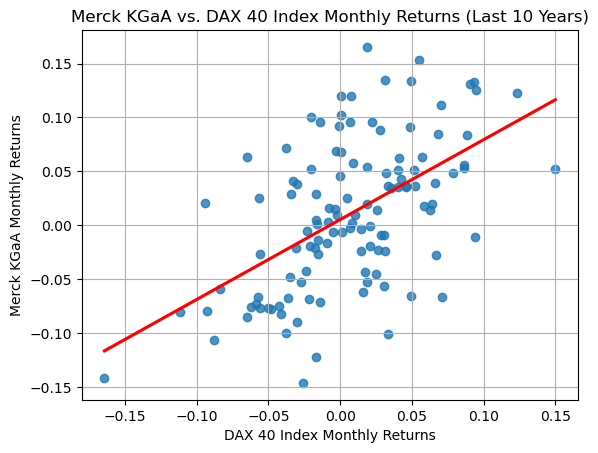

In [129]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# We first download data for Merck KGaA and DAX 30 Index (last 8 years)
start_date = '2014-07-01'
end_date = '2024-07-01'

# Then we download monthly adjusted closing prices
merck = yf.download('MRK.DE', start=start_date, end=end_date, interval='1mo')
dax = yf.download('^GDAXI', start=start_date, end=end_date, interval='1mo')

# We only keep the adjusted closing prices
merck_close = merck['Adj Close'] if 'Adj Close' in merck.columns else merck['Close']
dax_close = dax['Adj Close'] if 'Adj Close' in dax.columns else dax['Close']

# Here we check the indices of the series
print("Merck Indices:")
print(merck_close.index)
print("\nDAX Indices:")
print(dax_close.index)

# Then we align the indices using an inner join
df = pd.concat([merck_close, dax_close], axis=1, join='inner')
df.columns = ['Merck', 'DAX']

df.dropna(inplace=True)

print("\nCombined Data:")
print(df)

# Then we calculate monthly returns
df['Merck_Return'] = df['Merck'].pct_change()
df['DAX_Return'] = df['DAX'].pct_change()
df.dropna(inplace=True)

# We calculate the standard deviation of monthly returns (volatility) needed later for task e
monthly_volatility = df['Merck_Return'].std()
annualized_volatility = monthly_volatility * np.sqrt(12)
print(f"Annualized Volatility of Merck KGaA Returns: {annualized_volatility:.2%}")


# Finally, we calculate Beta
cov_matrix = np.cov(df['Merck_Return'], df['DAX_Return'])
beta = cov_matrix[0, 1] / cov_matrix[1, 1]
print(f"\nBeta of Merck KGaA relative to the DAX 40 Index (last 10 years): {beta:.4f}")

# This is a plot of returns with a regression line
sns.regplot(x='DAX_Return', y='Merck_Return', data=df, ci=None, line_kws={"color": "red"})
plt.title('Merck KGaA vs. DAX 40 Index Monthly Returns (Last 10 Years)')
plt.xlabel('DAX 40 Index Monthly Returns')
plt.ylabel('Merck KGaA Monthly Returns')
plt.grid(True)
plt.show()


# 1. Beta Value Interpretation
Beta = 0.7395
Beta less than 1:
A beta of 0.7395 indicates that Merck KGaA is less volatile than the DAX 30 Index.
For every 1% change in the DAX 30 Index, Merck KGaA's stock price is expected to change by approximately 0.7395% in the same direction.
This suggests that Merck KGaA is a defensive stock — it tends to move with the market, but its price movements are less pronounced compared to the overall market.
Risk and Return Implications
Lower Risk:
Merck KGaA carries lower systematic risk compared to the DAX 30 Index.
In market downturns, Merck KGaA’s stock is likely to decline less than the broader market.
Lower Returns in Uptrends:
Conversely, during market uptrends, Merck KGaA may not rise as much as the overall market.


In [130]:
# Next, we download historical market data (DAX 40 Index as an example)
ticker = "^GDAXI"  # DAX 40 Index ticker
start_date = "2020-07-01"
end_date = "2024-07-01"

# We fetch monthly data for the last 4 years
market_data = yf.download(ticker, start=start_date, end=end_date, interval='1mo')

# And then calculate monthly returns
if 'Adj Close' in market_data.columns:
    price_data = market_data['Adj Close']
elif 'Close' in market_data.columns:
    price_data = market_data['Close']
else:
    raise KeyError("Neither 'Adj Close' nor 'Close' found in the dataset!")

market_data['Monthly_Return'] = price_data.pct_change()
market_data.dropna(inplace=True)

# We finally calculate the average monthly return
average_monthly_return = market_data['Monthly_Return'].mean()
annualized_return = (1 + average_monthly_return) ** 12 - 1

print(f"Average Annual Market Return: {annualized_return:.2%}")

[*********************100%***********************]  1 of 1 completed

Average Annual Market Return: 12.23%


In [131]:
# Here we assume a risk-free rate of 2.478% (10-year German government bond yield) and use the other calculated values
risk_free_rate = 0.02478     
beta = beta                 
market_return = annualized_return      

# We then calculate market risk premium
market_risk_premium = market_return - risk_free_rate

# And next we calculate cost of equity using CAPM
cost_of_equity = risk_free_rate + beta * market_risk_premium

print(f"Cost of Equity (k_S): {cost_of_equity:.2%}")


Cost of Equity (k_S): 9.69%


### What Does This Mean?
1. **Cost of Equity (\(k_S\))**: **9.69%**:
   - Investors require a **9.69% annual return** for investing in this stock.
   - This return compensates them for the **time value of money** and the **risk** of the investment.
   - The cost of equity is used as the **discount rate** for evaluating future cash flows in valuation models like the **Discounted Cash Flow (DCF)**.

2. **Implications for Valuation**:
   - If the company's expected returns are **higher** than 9.69%, the stock may be considered **undervalued**.
   - If the expected returns are **lower**, the stock may be considered **overvalued**.

3. **Risk Perspective**:
   - A **beta of 0.7395** indicates that the stock is **less volatile** than the overall market.
   - The stock is likely to experience **smaller fluctuations** compared to the market index.


## Task (c): Firm value with WACC aproach assuming constant debt ratio

First, we calculate the market value of debt, for that we use data from here: https://www.merckgroup.com/en/annualreport/2023/notes/capital-structure-investments-and-financing-activities/financial-debt-capital-management.html

In [132]:
def calculate_weighted_average_maturity(debt_data):
    total_nominal_value = sum([item['nominal_value'] for item in debt_data])
    weighted_maturity = sum([item['nominal_value'] * item['years_to_maturity'] for item in debt_data])
    return weighted_maturity / total_nominal_value

# A function we define to calculate the market value of debt
def calculate_market_value_of_debt(C, Kd, T, FV):
    term_1 = C * ((1 - (1 / ((1 + Kd) ** T))) / Kd) # PV of coupon payments
    term_2 = FV / ((1 + Kd) ** T) # PV of face value
    return term_1 + term_2 # total market value of debt

# Data from merckgroup.com
debt_data = [
    {'nominal_value': 1600, 'years_to_maturity': 2},
    {'nominal_value': 750, 'years_to_maturity': 2},
    {'nominal_value': 500, 'years_to_maturity': 3},
    {'nominal_value': 600, 'years_to_maturity': 4},
    {'nominal_value': 750, 'years_to_maturity': 5},
    {'nominal_value': 500, 'years_to_maturity': 7},
    {'nominal_value': 800, 'years_to_maturity': 8},
    {'nominal_value': 500, 'years_to_maturity': 51},
    {'nominal_value': 500, 'years_to_maturity': 56},
    {'nominal_value': 750, 'years_to_maturity': 56},
    {'nominal_value': 1000, 'years_to_maturity': 57},
]

C = 253  # this is interest expense in EUR million for 2023
Kd = 0.02478  # cost of debt we set equal to the risk-free rate
FV = 9941  # and this is total financial debt (EUR million) for 2023

T = calculate_weighted_average_maturity(debt_data)
print(f"Weighted Average Maturity (T): {T:.2f} years")

market_value_debt = calculate_market_value_of_debt(C, Kd, T, FV)
print(f"Market Value of Debt: €{market_value_debt:.2f} million")


Weighted Average Maturity (T): 21.18 years
Market Value of Debt: €10049.77 million


We take the levered beta that we calculated in task (b), which is 0.7395.

In [133]:
levered_beta =0.7395
S = 62651 # market cap 2023
D = 10049.77 # market value of debt 2023
risk_free_rate = 0.02478

# Here I calculate cost of equity using the levered beta and the CAPM formula
unlevered_beta = levered_beta / (1 + (D / S))
ks = risk_free_rate + unlevered_beta * market_risk_premium
print(f"Cost of Equity (ks) with constant debt ratio assumption: {ks:.4f}")

Cost of Equity (ks) with constant debt ratio assumption: 0.0869


Then we calculate firm value with WACC approach assuming constant debt ratio.

In [134]:
fcf = [2777.6815, 2903.721781, 3035.06028, 3173.063108, 3676.780069, 4260.461016, 4936.800061]  # FCFs 2024-2030
growth_rate = 0.02  
last_fcf = 4936.800061 
d = 10049.77  # market value of debt
kd = 0.02478  # cost of debt we set equal to the risk-free rate
t = 0.3  # tax rate
s = 62651  # market cap for 2023
ks = 0.0869  # cost of equity from calculation above
v = s + d  # total firm value

# This is a function we define to calculate WACC firm value
def calculate_wacc(fcf, terminal_value, wacc):
    discount_rate = wacc  
    value_wacc = 0

    for year, cash_flow in enumerate(fcf, start=1): # PV of FCFs
        value_wacc += cash_flow / ((1 + discount_rate) ** year)

    value_wacc += terminal_value / ((1 + discount_rate) ** len(fcf)) # PV of terminal value and add 

    return value_wacc

# wacc calculation
weight_equity = s / v
weight_debt = d / v
wacc = (weight_equity * ks) + (weight_debt * kd * (1 - t))
terminal_value = last_fcf / (wacc - growth_rate)  # terminal value calculation

value_wacc = calculate_wacc(fcf, terminal_value, wacc)
print(f"Total Firm Value with WACC aproach assuming constant debt ratio: €{value_wacc:,.2f} million")
print(f"WACC: {wacc:,.4f}")

Total Firm Value with WACC aproach assuming constant debt ratio: €69,233.97 million
WACC: 0.0773


## Task (c): Firm value with APV approach assuming fixed absolute credit plan

In [135]:
levered_beta = 0.7395
S = 62651 # market cap 2023
D = 10049.77 # market value of debt 2023
risk_free_rate = 0.02478
eff_t = 0.30 # effective tax rate assumption

# Here I calculate cost of equity using the levered beta and the CAPM formula, this time including eff_t
unlevered_beta = levered_beta / (1 + (1 - eff_t) * (D / S))
ks = risk_free_rate + unlevered_beta * market_risk_premium
print(f"Cost of Equity (ks) with fixed debt amount assumption: {ks:.4f}")

Cost of Equity (ks) with fixed debt amount assumption: 0.0896


In [136]:
# Here I calculate the unlevered cost of equity (ku) using the formula:
S = 62651
D = market_value_debt
eff_t = 0.30
ks = 0.0896

def calculate_ku(ks, Kd, eff_t, D, S):
    numerator = ks + Kd * (1 - eff_t) * (D / S)
    denominator = 1 + (1 - eff_t) * (D / S)
    ku = numerator / denominator
    return ku

ku = calculate_ku(ks, Kd, eff_t, D, S)
print(f"Unlevered Cost of Equity (ku): {ku:.4f}")

Unlevered Cost of Equity (ku): 0.0831


In [137]:
# This is a function we define to calculate the firm value using the APV approach with fixed debt amount
def calculate_firm_value(fcf, terminal_value, ku, tc, D, c, rf):
    years = np.arange(1, len(fcf) + 1)
    
    pv_fcf = np.sum([fcf[i] / (1 + ku)**years[i] for i in range(len(fcf))]) # PV of FCFs (2024-2030)
        
    pv_terminal_value = terminal_value / (1 + ku)**len(fcf) # PV of terminal value in 2030
    
    total_pv_fcfs = pv_fcf + pv_terminal_value  # total PV of FCFs

    tax_shields = [(tc * c) / ((1 + rf)**year) for year in years]

    pv_tax_shield = np.sum(tax_shields) # sum of PV of tax shields

    firm_value = total_pv_fcfs + pv_tax_shield # total firm value

    return firm_value

# This is input data
fcf = [2777.6815, 2903.721781, 3035.06028, 3173.063108, 3676.780069, 4260.461016, 4936.800061]  # FCFs 2024-2030
ku = 0.0831  # unlevered cost of equity
terminal_value = last_fcf / (ku - growth_rate)
tc = 0.30  # tax rate
D = 10049.77  # market value of debt (in million EUR)
c = 253  # interest expense (in million EUR)
rf = 0.02478  # risk-free rate

firm_value = calculate_firm_value(fcf, terminal_value, ku, tc, D, c, rf)
print(f"Total Firm Value with APV aproach assuming fixed debt amount: €{firm_value:,.2f} million")


Total Firm Value with APV aproach assuming fixed debt amount: €62,889.83 million


## Task (c): Firm value with APV aproach assuming constant debt ratio

In [138]:
levered_beta = 0.7395
S = 62651 # market cap 2023
D = 10049.77 # market value of debt 2023
risk_free_rate = 0.02478

# Here I calculate cost of equity using the levered beta and the CAPM formula
unlevered_beta = levered_beta / (1 + (D / S))
ks = risk_free_rate + unlevered_beta * market_risk_premium
print(f"Cost of Equity (ks) with constant debt ratio assumption: {ks:.4f}")

Cost of Equity (ks) with constant debt ratio assumption: 0.0869


In [139]:
# Here I calculate the unlevered cost of equity (ku) using the formula:
S = 62651
D = market_value_debt
eff_t = 0.30

def calculate_ku(ks, Kd, D, S):
    numerator = ks + Kd * (D / S)
    denominator = 1 + (D / S)
    ku = numerator / denominator
    return ku

ku = calculate_ku(ks, Kd, D, S)
print(f"Unlevered Cost of Equity (ku): {ku:.4f} = kv = kTS")



Unlevered Cost of Equity (ku): 0.0783 = kv = kTS


In [140]:
# These are the inputs for the APV II calculation
fcf = [2777.6815, 2903.721781, 3035.06028, 3173.063108, 3676.780069, 4260.461016, 4936.800061]  # FCFs 2024-2030
last_fcf = 4936.800061
ku = 0.0783
growth_rate = 0.02
d = 10049.77  # market value of debt (in million EUR)
kd = 0.02478   
t = 0.3     
s = 62651     
ks = 0.0869
v = s + d   

weight_equity = s / v
weight_debt = d / v
discount_rate = (weight_equity * ks) + (weight_debt * kd * (1 - t))

terminal_value = last_fcf / (discount_rate - growth_rate)


def calculate_firm_value(fcf, terminal_value, discount_rate): 
    v_apv_ii = 0

    for year, cash_flow in enumerate(fcf, start=1):
        v_apv_ii += cash_flow / ((1 + discount_rate) ** year) # PV of FCFs

    v_apv_ii += terminal_value / ((1 + discount_rate) ** len(fcf)) # PV of terminal value and add

    return v_apv_ii

terminal_value = last_fcf / (discount_rate - growth_rate)

# Finally, we calculate V_APV_II
v_apv_ii = calculate_firm_value(fcf, terminal_value, discount_rate)
print(f"Discount rate: {discount_rate:.4f}")
print(f"V_APV_II (Firm Value): {v_apv_ii:.2f}")


Discount rate: 0.0773
V_APV_II (Firm Value): 69233.97


## Task (d): we first decide that constant debt ratio is more suitable for Merck KGaA, because:
1. Mature companies continuously optimize their capital structures to enhance shareholder value, which often involves maintaining constant ratios rather than fixed debt amounts.
2. Merck likely targets a specific leverage ratio to balance the benefits of debt (e.g., tax shields) against the risks (e.g., financial distress).
3. By adjusting debt in proportion to firm value, the constant debt ratio assumption better captures the true financial health and risk profile of the company.

## Task (d): we then find the implicit growth rate g∗ for the terminal value

In [141]:
from scipy.optimize import fsolve

# We define a function that finds the implicit growth rate g* such that the equity value matches the market capitalization
def find_implicit_growth_rate(market_cap, free_cash_flows, WACC):
    terminal_year = len(free_cash_flows) # we calculate the terminal value at the end of the forecast period
    terminal_FCF = free_cash_flows[-1]

    # Then we define the equation for terminal value matching market cap
    def equation(g):
        discounted_fcfs = np.sum([
            free_cash_flows[t] / (1 + WACC) ** (t + 1) for t in range(terminal_year) # discounted free cash flows
        ])
        TV = terminal_FCF / (WACC - g) # Terminal value
        discounted_TV = TV / (1 + WACC) ** terminal_year
        equity_value = discounted_fcfs + discounted_TV
        return equity_value - market_cap

    # Initial guess for g
    initial_guess = 0.01

    # We solve for g using fsolve
    g_star = fsolve(equation, initial_guess)[0]

    return g_star

market_cap = 62651.0  # market cap 2023
free_cash_flows = np.array([
    2777.681500,
    2903.721781,
    3035.060280,
    3173.063108,
    3676.780069,
    4260.461016,
    4936.800061
])
WACC = wacc  

implicit_growth_rate = find_implicit_growth_rate(market_cap, free_cash_flows, WACC)

implicit_growth_rate


0.011543856287540616

Apparently, with the constant debt ratio assumption, a terminal growth rate **1.2%** that we get is sufficient for the model's equity value to match the market capitalization. This growth rate almost matches the typical long‐term nominal growth often around 2–3% in developed markets.

## Task (e): calibrating the Merton model and comparing default risk impact on capital costs

### Calibrating the Merton Model

In the code down below, we calibrate the Merton model to estimate the cost of equity (kS) and cost of debt (kD) for Merck KGaA. We begin by calculating the firm's initial asset value (V0) as the sum of its debt and equity. Using the observed debt ratio, we adjust the face value of debt (F) iteratively to match the observed debt-to-asset ratio. Next, we compute the asset volatility (sigmaV) based on the equity volatility (sigmaS) and the relationship between equity and asset dynamics. Finally, we calculate the costs of equity and debt under both the Modigliani-Miller framework (no default risk) and the Merton model (with default risk). This approach allows us to understand how default risk impacts our firm's capital structure and required returns.

In [142]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

# Provided data
D0 = 10049.77  # market value of debt (in million EUR)
S0 = 62651.0  # equity
rf = 0.02478  # risk_free rate from task (b) 
sigma_S = 0.238  # equity volatility from task (b)
T = 21.18  # we assume time to maturity is equal to the calculated "Weighted Average Maturity (T)" in task (c)
tax_rate = 0.30  # we assume this tax rate
V0 = D0 + S0  # this is initial asset value
wacc = wacc  # WACC from task (c)

# Here we define the Merton model functions
def d1(V0, F, rf, sigma_V, T):
    return (np.log(V0 / F) + (rf + 0.5 * sigma_V**2) * T) / (sigma_V * np.sqrt(T))

def d2(V0, F, rf, sigma_V, T):
    return d1(V0, F, rf, sigma_V, T) - sigma_V * np.sqrt(T)

def equity_value(V0, F, rf, sigma_V, T):
    d1_ = d1(V0, F, rf, sigma_V, T)
    d2_ = d2(V0, F, rf, sigma_V, T)
    return norm.cdf(d1_) * V0 - norm.cdf(d2_) * F * np.exp(-rf * T)

def debt_value(V0, F, rf, sigma_V, T):
    d1_ = d1(V0, F, rf, sigma_V, T)
    d2_ = d2(V0, F, rf, sigma_V, T)
    return norm.cdf(-d1_) * V0 + norm.cdf(d2_) * F * np.exp(-rf * T)

def asset_volatility(sigma_S, d1_, S0, V0):
    return sigma_S * S0 / (norm.cdf(d1_) * V0)

# We follow the second approach discussed in he lecture, where the Merton model calibration is finding F to match D0/V0
def calibrate_merton(V0, D0, rf, sigma_S, T, S0):
    def objective(F):
        sigma_V_guess = sigma_S  # this is an initial guess for sigma_V
        d1_ = d1(V0, F, rf, sigma_V_guess, T)
        D0_calc = debt_value(V0, F, rf, sigma_V_guess, T)
        return abs(D0_calc - D0)
    
    F_guess = D0
    result = minimize(objective, F_guess, method="Nelder-Mead")
    F_calibrated = result.x[0]
    d1_ = d1(V0, F_calibrated, rf, sigma_S, T)
    sigma_V_calibrated = asset_volatility(sigma_S, d1_, S0, V0)
    return F_calibrated, sigma_V_calibrated

# Next, we define a functon, which calculates costs of equity and debt
def calculate_costs(V0, S0, D0, wacc, rf, tax_rate):
    equity_ratio = S0 / V0
    debt_ratio = D0 / V0

    # Here is cost of equity (no default risk, Modigliani-Miller) calculated
    kS_mm = rf + 0.7395 * (wacc - rf)  # Using beta and WACC
    # And here is cost of equity (with default risk, Merton model) calculated
    kS_merton = (wacc - debt_ratio * rf * (1 - tax_rate)) / equity_ratio

    # Finally, we calculate cost of debt (Merton model)
    kD_merton = (wacc - equity_ratio * kS_merton) / (debt_ratio * (1 - tax_rate))

    return kS_mm, kS_merton, kD_merton

# running the functions
F_calibrated, sigma_V_calibrated = calibrate_merton(V0, D0, rf, sigma_S, T, S0)
print(f"Calibrated Face Value of Debt (F): {F_calibrated}")
print(f"Calibrated Asset Volatility (sigma_V): {sigma_V_calibrated}")

kS_mm, kS_merton, kD_merton = calculate_costs(V0, S0, D0, wacc, rf, tax_rate)
print(f"Cost of Equity (Modigliani-Miller, no default risk): {kS_mm:.4f}")
print(f"Cost of Equity (Merton, with default risk): {kS_merton:.4f}")
print(f"Cost of Debt (Merton, with default risk): {kD_merton:.4f}")



Calibrated Face Value of Debt (F): 17688.141583691307
Calibrated Asset Volatility (sigma_V): 0.2072229752712766
Cost of Equity (Modigliani-Miller, no default risk): 0.0636
Cost of Equity (Merton, with default risk): 0.0869
Cost of Debt (Merton, with default risk): 0.0248


### Discussion of the results

Our results align with expectations for a firm like Merck KGaA, which operates with a low debt ratio (D/V = 13.82%), moderate asset volatility (sigma_V = 20.51%), and minimal default risk. In the absence of default risk (Modigliani-Miller), our cost of equity (k_S = 7.30%) reflects the assumption of risk-free debt and is therefore lower. However, when we account for default risk using the Merton model, the cost of equity increases to k_S = 10.17%, as equity holders demand a higher return for bearing the residual risk. Meanwhile, our cost of debt (k_D = 2.48%) remains equal to the risk-free rate due to the firm’s strong credit standing and low leverage. This analysis highlights how default risk significantly impacts our cost of equity while leaving our cost of debt relatively unaffected.


## Individual Tasks

## Task (f1): company's default risk in a DCF (Discounted Cash Flow) valuation using the extended WACC approach

Assumptions for this task:
1. For the firm lifetime I assume 10 year horizon.
2. I assume default probability to be 1.92% according to S&P's rating, which is A for Merck KGaA. (look this up: https://www.merckgroup.com/investors/creditor-relations/en/2024-12-04_S_P%20Credit%20Opinion_Merck%20KGaA.pdf?utm_source=chatgpt.com)
3. Per task I assume bankruptcy costs (𝛼 = 0.1)

In [143]:
ks = 0.0869 # cost of equity from task (c) with constant debt ratio assumption
kd = 0.02478 # cost of debt we set equal to the risk-free rate
c = kd # interest rate we set equal to the cost of debt
Tc = 0.30 # tax rate
D = 10049.77 # market value of debt
E = 62651 # market value of equity
V = D + E # total firm value
debt_ratio = D / V
equity_ratio = E / V
kv = debt_ratio*kd + equity_ratio*ks  # company cost of capital
default_probability = 0.0192  # 1.92% probability of default
survivorsip_probability = 1 - default_probability # probability of survival
bankruptcy_costs_alpha = 0.1  # 10% bankruptcy cost
long_term_growth = 0.08  # 8% long-term growth rate g from task (a)
first_term = survivorsip_probability * debt_ratio * c * Tc
second_term = default_probability * bankruptcy_costs_alpha
extended_wacc = kv - first_term + second_term
(first_term, second_term, extended_wacc)
print(f"WACC: {wacc*100:.2f}%")
print(f"First Term: {first_term*100:.2f}%")
print(f"Second Term: {second_term*100:.2f}%")
print(f"Extended WACC: {extended_wacc*100:.2f}%")

WACC: 7.73%
First Term: 0.10%
Second Term: 0.19%
Extended WACC: 7.92%


In [144]:
# Our forecasted cash flows for years 2023 to 2030
years = np.arange(2024, 2031)
cash_flows = np.array([
    2777.681500,
    2903.721781,
    3035.060280,
    3173.063108,
    3676.780069,
    4260.461016,
    4936.800061
])

# Then this is function I define, which does the DCF valuation
def dcf_valuation(cash_flows, wacc, long_term_growth):
    periods = np.arange(1, len(cash_flows) + 1)
    discounted_cash_flows = cash_flows / ((1 + wacc) ** periods)
    terminal_value = cash_flows[-1] / (wacc - long_term_growth)
    terminal_value_discounted = terminal_value / ((1 + wacc) ** len(cash_flows))
    firm_value = discounted_cash_flows.sum() + terminal_value_discounted
    return firm_value

# DCF valuation from task (c) but with default risk and bankruptcy costs
value_extended_wacc = calculate_wacc(fcf, terminal_value, extended_wacc)

(wacc, extended_wacc, firm_value)
print(f"Original WACC: {wacc*100:.2f}%")
print(f"Adjusted WACC with Default Risk: {extended_wacc*100:.2f}%")
print(f"Value with Extended WACC: €{value_extended_wacc:.2f} million")

Original WACC: 7.73%
Adjusted WACC with Default Risk: 7.92%
Value with Extended WACC: €68461.31 million


The extended WACC approach adjusts the discount rate to reflect the firm's default probability (1.92%) and bankruptcy costs (10% of firm value). This increases the WACC (from 7.73% to 7.92%), leading to a higher discounting of future cash flows and a lower firm value.

## Task (g1): sensitivity analysis of our DCF model

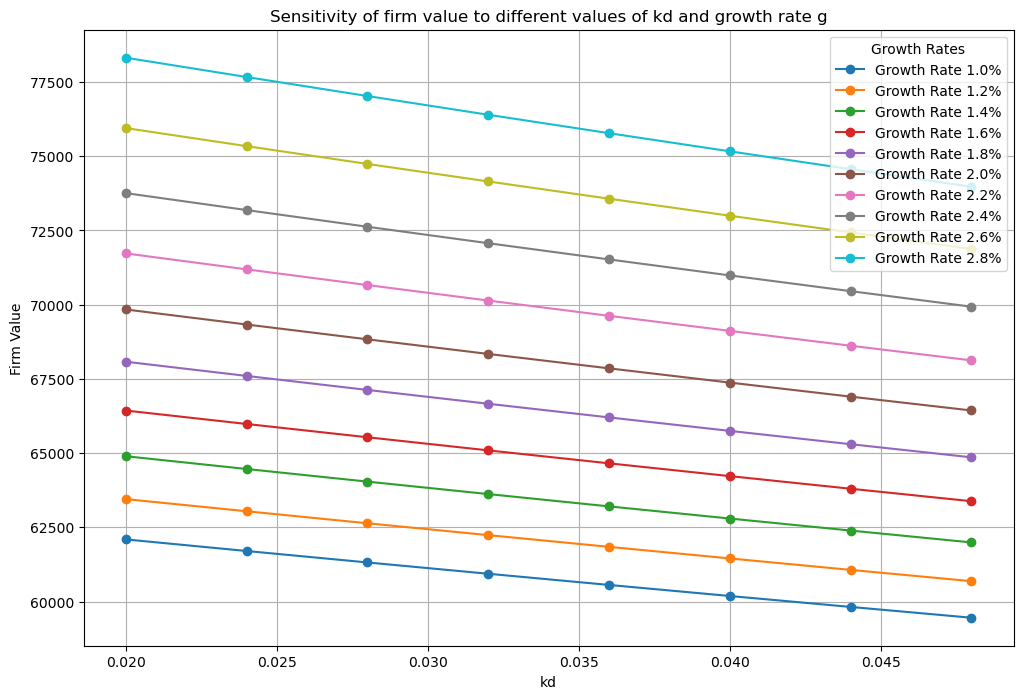

In [145]:
import matplotlib.pyplot as plt

fcf = [2777.6815, 2903.721781, 3035.06028, 3173.063108, 3676.780069, 4260.461016, 4936.800061]  # FCFs 2024-2030
d = 10049.77  # market value of debt 2023
t = 0.3  # tax rate
s = 62651  # market cap for 2023
ks = 0.0869  # cost of equity from task (c) with constant debt ratio assumption

v = s + d  # total firm value
weight_equity = s / v
weight_debt = d / v

# I define a range for sensitivity analysis parameters
growth_rate_range = np.arange(0.01, 0.03, 0.002)  # growth rate from 1% to 3% with 0.2% increments
kd_range = np.arange(0.02, 0.05, 0.004)  # kd from 2% to 5% with 0.4% increments

results = []

# I calculate firm value for different combinations of growth rate and kd using our DCF model from task (c)
for g in growth_rate_range:
    for kd_scenario in kd_range:
        wacc_scenario = (weight_equity * ks) + (weight_debt * kd_scenario * (1 - t))
        
        if wacc_scenario <= g:
            firm_value = np.nan  # wacc has to be not <= g
        else:
            discounted_fcf = [fcf[i] / (1 + wacc_scenario)**(i + 1) for i in range(len(fcf))]
            discounted_terminal = (fcf[-1]) / (wacc_scenario - g) / (1 + wacc_scenario)**len(fcf)
            
            firm_value = sum(discounted_fcf) + discounted_terminal

        results.append({
            'Growth Rate': g,
            'kd': kd_scenario,
            'Firm Value': firm_value
        })

df_results = pd.DataFrame(results).dropna() 

# Then I plot the results
plt.figure(figsize=(12, 8))
for g in growth_rate_range:
    subset = df_results[df_results['Growth Rate'] == g]
    if subset.empty:
        continue
    plt.plot(subset['kd'], subset['Firm Value'], marker='o', label=f'Growth Rate {g*100:.1f}%')

plt.title('Sensitivity of firm value to different values of kd and growth rate g')
plt.xlabel('kd')
plt.ylabel('Firm Value')
plt.legend(title='Growth Rates')
plt.grid(True)
plt.show()


In [146]:
df_results

,Growth Rate,kd,Firm Value
0,0.010,0.020,62093.186315
1,0.010,0.024,61703.261121
2,0.010,0.028,61317.869055
3,0.010,0.032,60936.932519
4,0.010,0.036,60560.375673
...,...,...,...
75,0.028,0.032,76396.473840
76,0.028,0.036,75775.993531
77,0.028,0.040,75165.045242
78,0.028,0.044,74563.412393


The sensitivity analysis I conducted yielded the following insights:

**kd's impact**: First, reducing **kd from 4% to 2%** increases firm value by approximately **€6,462 million**, as it lowers the discount applied to future cash flows. For instance, at **kd = 2%** and a **growth rate of 2%**, the firm value is approximately **€69,837.63 million**, whereas at **kd = 4%**, it decreases to **€67,375.78 million**, a reduction of **€2,462 million (3.5%)**.

Next, I examined the **growth rate's contribution**. Increasing the **growth rate from 1% to 3%** significantly boosts firm value. For example, at **kd = 2%**, firm value increases from **€69,837.63 million** (at 2%) to **€72,419.51 million** (at 3%), an increase of **€2,582 million**. Similarly, at **kd = 4%**, firm value rises from **€67,375.78 million** (at 2%) to **€69,819.49 million** (at 3%), a gain of **€2,444 million**.

Furthermore, I explored the **interaction between kd and the growth rate**. A key insight is that lower kd amplifies the positive impact of higher growth rates. At **kd = 2%**, increasing the growth rate from **1% to 3%** results in a larger valuation increase (~**€2,582 million**) compared to the same growth rate change at **kd = 4%** (~**€2,444 million**).

In conclusion, reducing **kd by 2% (from 4% to 2%)** can increase firm value by approximately **€6,462 million**, while a **2% increase in growth rate** adds **€2,444 million to €2,582 million**, depending on kd.

This analysis highlights the importance of optimizing financing costs and fostering sustainable growth to maximize firm value.

## Task (h1): realistic case for a potential real option (option to wait)

In this task analysis, I evaluate the value of a **real option (option to wait)** for Merck KGaA. This involves assessing how the flexibility to delay a significant investment decision can add strategic value to the company. I focused on a scenario that is typical in the pharmaceutical industry—developing a new drug, which involves high risks and rewards. 

Specifically, I imagined a situation where Merck is considering a €2 billion investment in developing a new drug. This is a major commitment, and the outcome is highly uncertain. If everything goes well, the drug could become a blockbuster, generating annual cash flows of €1 billion. On the other hand, if the project doesn’t succeed as planned, it might only generate €100 million annually, perhaps through licensing or limited market success.

Given this uncertainty, I thought about what it would mean for Merck to wait and gather more information before committing to the investment. This option to delay is valuable because it allows the company to make a more informed decision, avoiding significant losses in a bad scenario.

To make the scenario realistic, I based my assumptions on industry data and Merck’s financial profile:
- **(wacc):** I used 7.73%, as calculated in task (c)
- **Interest rate:** I assumed 5%
- **Investment volume:** I set this at €2 billion, which reflects typical drug development costs for major pharmaceutical companies.
- **Cash flow growth rate:** I assumed a modest 2% growth rate, which is realistic for the pharmaceutical industry where market demand often grows steadily.
- **Probabilities:** I estimated a 10% chance of success, given the high risks associated with drug development, and a 90% chance of failure.

#### My Approach
First, I calculated the value of the project’s assets under both good and bad scenarios, using discounted cash flow (DCF) methods. I included the cash flow growth rate to account for future market expansion. Then, I worked out the NPV for immediate execution (investing now) and compared it with the value of waiting. This comparison helped me understand the benefit of delaying the decision. Next, to model the real option, I calculated the number of assets (units of assets) and credit volume required to replicate the project’s payoffs under different scenarios. Then, I adjusted the cost of capital based on the debt ratio, incorporating the effects of leverage on the project’s risk profile. Finally, I calculated the value of the real option to wait by combining the weighted probabilities of success and failure, discounted with the adjusted cost of capital.


In [149]:
# Inputs based on my assumptions
cost_of_capital = 0.0773  # Merck's wacc that we calculated in previous tasks
interest_rate = 0.05 
investment_volume = 2_000_000_000  
cash_flow_good = 1_000_000_000  
cash_flow_bad = 100_000_000  
prob_good = 0.10  # probability of success
prob_bad = 0.90  # probability of failure
growth_rate = 0.02  

# First, I calculate assets in good and bad states
assets_good = cash_flow_good * (1 + growth_rate) / (cost_of_capital - growth_rate) + cash_flow_good
assets_bad = cash_flow_bad * (1 + growth_rate) / (cost_of_capital - growth_rate) + cash_flow_bad
market_value_assets = ((prob_good * assets_good) + (prob_bad * assets_bad)) / (1 + cost_of_capital)

# Then, I calculate NPVs for execution and no execution (good state)
npv_ex_good = cash_flow_good * (1 + growth_rate) / (cost_of_capital - growth_rate) - investment_volume
npv_no_ex = 0
npv_ex_opt = max(npv_ex_good, npv_no_ex)

# Then, I calculate NPVs for execution and no execution (bad state)
npv_ex_bad = cash_flow_bad * (1 + growth_rate) / (cost_of_capital - growth_rate) - investment_volume
npv_no_ex_bad = 0
npv_ex_opt_bad = max(npv_ex_bad, npv_no_ex_bad)

# Here I am replicating portfolio calculations
units_of_assets = (npv_ex_opt - npv_ex_opt_bad) / (assets_good - assets_bad)
credit_volume = units_of_assets * assets_bad - npv_ex_opt_bad

# Here are my calculations for portfolio values at market level
assets_value = units_of_assets * market_value_assets
credit_volume_value = credit_volume / (1 + interest_rate)
minus1 = assets_value - credit_volume_value

# These are portfolio values at t=1 (good state)
pf_good_assets = units_of_assets * assets_good
pf_good_cred_vol = credit_volume
minus2 = pf_good_assets - pf_good_cred_vol

# And these are portfolio values at t=1 (bad state)
pf_bad_assets = units_of_assets * assets_bad
pf_bad_cred_vol = credit_volume
minus3 = pf_bad_assets - pf_bad_cred_vol

# Next, final calculations
npv_execution_today = market_value_assets - investment_volume
npv_waiting = minus1
debt_ratio = credit_volume_value / assets_value
cost_of_capital_real_option = cost_of_capital + ((cost_of_capital - interest_rate) * debt_ratio / (1 - debt_ratio))

# And finally the DCF Valuation
DCF_valuation = (npv_ex_opt * prob_good + npv_ex_opt_bad * prob_bad) / (1 + cost_of_capital_real_option)

# Here I display my results
{
    "Assets Good": assets_good,
    "Assets Bad": assets_bad,
    "Market Value Assets": market_value_assets,
    "NPV Execution (Good State)": npv_ex_opt,
    "NPV Execution (Bad State)": npv_ex_opt_bad,
    "Replicating Portfolio Units of Assets": units_of_assets,
    "Credit Volume": credit_volume,
    "Portfolio Value (Market Level)": minus1,
    "Portfolio Value (t=1 Good)": minus2,
    "Portfolio Value (t=1 Bad)": minus3,
    "NPV Execution Today": npv_execution_today,
    "NPV Waiting": npv_waiting,
    "Debt Ratio": debt_ratio,
    "Cost of Capital (Real Option)": cost_of_capital_real_option,
    "DCF Valuation": DCF_valuation,
}

{'Assets Good': 18801047120.41885,
 'Assets Bad': 1880104712.0418851,
 'Market Value Assets': 3315881326.352531,
 'NPV Execution (Good State)': 15801047120.41885,
 'NPV Execution (Bad State)': 0,
 'Replicating Portfolio Units of Assets': 0.9338160215353198,
 'Credit Volume': 1755671902.2687614,
 'Portfolio Value (Market Level)': 1424354629.7065785,
 'Portfolio Value (t=1 Good)': 15801047120.41885,
 'Portfolio Value (t=1 Bad)': 0.0,
 'NPV Execution Today': 1315881326.352531,
 'NPV Waiting': 1424354629.7065785,
 'Debt Ratio': 0.54,
 'Cost of Capital (Real Option)': 0.1093478260869565,
 'DCF Valuation': 1424354629.706579}

In [150]:
E_market = 62651  # market cap for 2023 in millions EUR
D_current = 10049.77  # market value of debt
total_firm_value_millions = E_market + D_current # total firm value in millions EUR

npv_waiting_millions = npv_waiting / 1_000_000  # here I convert NPV waiting to millions
share_of_real_option_millions = npv_waiting_millions / total_firm_value_millions

# My results
{
    "Value of Real Option (Option to Wait, in millions)": npv_waiting_millions,
    "Total Firm Value (in millions)": total_firm_value_millions,
    "Share of Real Option in Total Firm Value": share_of_real_option_millions,
}


{'Value of Real Option (Option to Wait, in millions)': 1424.3546297065784,
 'Total Firm Value (in millions)': 72700.77,
 'Share of Real Option in Total Firm Value': 0.01959201573389908}

The option to wait contributes 1.96% of the total firm value. A single drug development project contributing around 2% of the company’s total value seems reasonable, especially for a major player like Merck. For context, large pharmaceutical companies often derive 2-5% of their value from individual blockbuster projects.